# Comparing methods for a simple ODE

## Exercise 1

Use Euler's Method to solve for $x(t)$ given
$$ \frac{\text d x}{\text d t} = -x^3(t) + \sin(t) $$
from 0 to 10 seconds, with initial condition $x(t=0) = 0$.

Try with 20 time-steps, and again with 1000 time-steps. Plot the results, on the same graph.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [116]:
import matplotlib as mpl
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["hotpink", "cornflowerblue", "yellowgreen", "gold", "mediumpurple"]) 

In [105]:
def f(x, t):
    return -x**3 + np.sin(t)

def euler(x0, t0, tf, Nt):
    h = (tf-t0)/Nt
    t = np.linspace(t0, tf, Nt)

    x = np.zeros(Nt)
    x[0] = x0
    for i in range(1, Nt):
        x[i] = x[i-1] + h*f(x[i-1], t[i])
    return t, x

Text(0.5, 1.0, 'Euler')

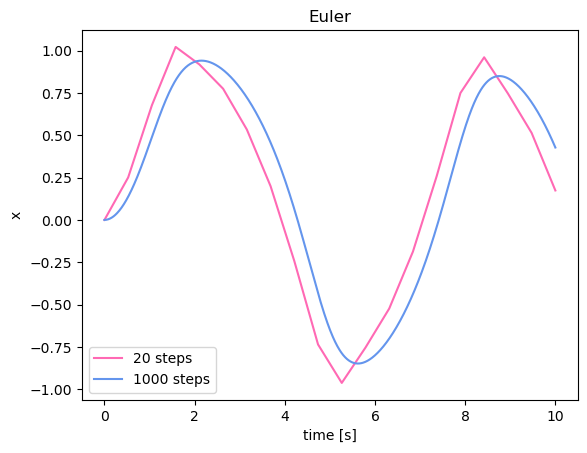

In [106]:
for N in [20, 1000]:
    t, x = euler(0, 0, 10, N)
    plt.plot(t, x, label=f"{N} steps")

plt.legend()
plt.xlabel("time [s]")
plt.ylabel("x")
plt.title("Euler")

## Exercise 2

Repeat Exercise 1 using RK2.

In [107]:
def RK2(x0, t0, tf, Nt):
    h = (tf-t0)/Nt
    t = np.linspace(t0, tf, Nt)

    x = np.zeros(Nt)
    x[0] = x0

    for i in range(0, Nt-1):
        k1 = h*f(x[i], t[i])
        k2 = h*f(x[i] + 0.5*k1, t[i] + 0.5*h)
        x[i+1] = x[i] + k2

    return t, x

Text(0.5, 1.0, 'RK2')

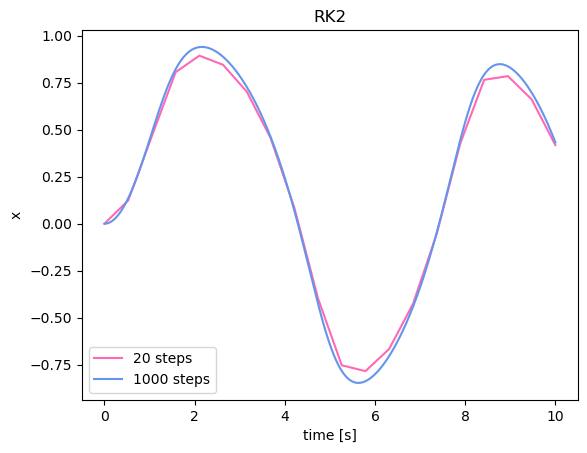

In [108]:
for N in [20, 1000]:
    t, x = RK2(0, 0, 10, N)
    plt.plot(t, x, label=f"{N} steps")

plt.legend()
plt.xlabel("time [s]")
plt.ylabel("x")
plt.title("RK2")

## Exercise 3

Repeat Exercise 1 using RK4.

In [109]:
def RK4(x0, t0, tf, Nt):
    h = (tf-t0)/Nt
    t = np.linspace(t0, tf, Nt)

    x = np.zeros(Nt)
    x[0] = x0

    for i in range(0, Nt-1):
        k1 = h*f(x[i], t[i])
        k2 = h*f(x[i] + 0.5*k1, t[i] + 0.5*h)
        k3 = h*f(x[i] + 0.5*k2, t[i] + 0.5*h)
        k4 = h*f(x[i]+k3, t[i]+h)
        x[i+1] = x[i] + (k1+2*k2+2*k3+k4)/6

    return t, x

Text(0.5, 1.0, 'RK4')

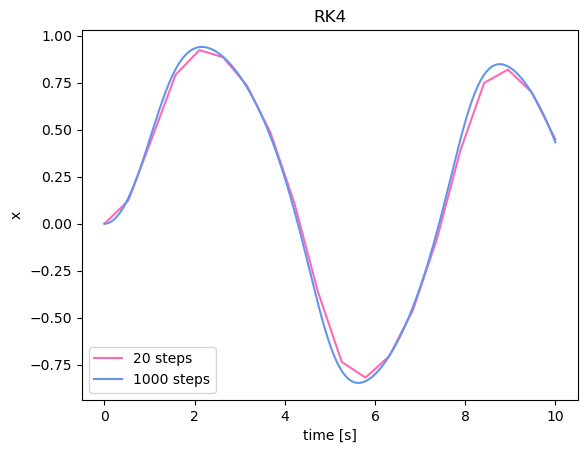

In [110]:
for N in [20, 1000]:
    t, x = RK4(0, 0, 10, N)
    plt.plot(t, x, label=f"{N} steps")

plt.legend()
plt.xlabel("time [s]")
plt.ylabel("x")
plt.title("RK4")

## Exercise 4

Repeat Exercise 1 using Bulirsch-Stoer, with error tolerance 1e-08. You may copy-and-paste code from the textbook's 'bulirsch.py' to help you.

In [298]:
def BulirschStoer(x0, t0, tf, Nt, eps=1e-8):
    H = (tf-t0)/Nt
    T = np.linspace(t0, tf, Nt)
    X = []

    x = x0

    for t in T:
        X.append(x)

        n = 1 
        x1 = x + 0.5*H*f(x, t)
        x2 = x + H*f(x1, t)

        R1 = np.array([0.5*(x1 + x2 + 0.5*H*f(x2, t))])

        err = 2*H*eps
        while np.abs(err) > H*eps:
            n += 1
            h = H/n 

            x1 = x + 0.5*h*f(x, t)
            x2 = x + h*f(x1, t)
            for i in range(n-1):
                x1 += h*f(x2, t)
                x2 += h*f(x1, t)

            R2 = R1
            R1 = np.empty([n,1], float)
            R1[0] = 0.5*(x1 + x2 + 0.5*h*f(x2, t))
  
            for m in range(1, n):

                err = (R1[m-1] - R2[m-1])/((n/(n-1))**(2*m)-1)
                R1[m] = R1[m-1] + err
    
        x = float(R1[n-1])
   
    return T, X

t, x = BulirschStoer(0, 0, 10, 20)

2 [[0.]
 [0.]] 0 0.0
5 [[0.24920153]
 [0.24922117]
 [0.24922115]
 [0.24922116]
 [0.24922115]] 0.0 0.5263157894736842
7 [[0.62988691]
 [0.62998596]
 [0.62998593]
 [0.62998594]
 [0.62998594]
 [0.62998594]
 [0.62998594]] 0.24922115049795604 1.0526315789473684
8 [[0.88782906]
 [0.88794075]
 [0.88794191]
 [0.88794182]
 [0.88794182]
 [0.88794182]
 [0.88794182]
 [0.88794181]] 0.629985935051931 1.5789473684210527
8 [[0.93403625]
 [0.93405948]
 [0.93406023]
 [0.93406017]
 [0.93406017]
 [0.93406017]
 [0.93406017]
 [0.93406017]] 0.887941814105705 2.1052631578947367
8 [[0.83922536]
 [0.83918651]
 [0.83918537]
 [0.83918545]
 [0.83918546]
 [0.83918546]
 [0.83918546]
 [0.83918546]] 0.9340601666243986 2.631578947368421
5 [[0.6371008 ]
 [0.63700907]
 [0.63700576]
 [0.63700624]
 [0.63700623]] 0.8391854598944551 3.1578947368421053
6 [[0.32104188]
 [0.32107121]
 [0.32107118]
 [0.32107118]
 [0.32107119]
 [0.32107118]] 0.637006234812991 3.6842105263157894
6 [[-0.12021197]
 [-0.12017988]
 [-0.12018   ]
 [-0.

In [278]:
t, x = BulirschStoer(0, 0, 10, 20)

IndexError: index 2 is out of bounds for axis 0 with size 2

Text(0.5, 1.0, 'Burlirsch-Stoer')

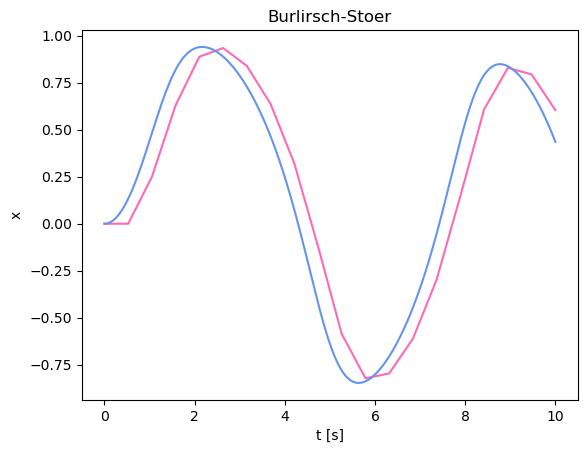

In [144]:
for N in [20, 1000]:
    t, x = BulirschStoer(0, 0, 10, N)
    plt.plot(t, x, label=f"{N} steps")
plt.xlabel("t [s]")
plt.ylabel("x")
plt.title("Burlirsch-Stoer")

And then I tried to implement it using recusion but I couldn't figure it out...

In [305]:
def R(n, m, Rn1):
    if m == 1:
        return Rn1
    else:
        Rn = R(n, m-1, Rn1)
        err = (Rn - R(n-1, m-1, Rn1))/((n/(n-1))**(2*m)-1)
        return Rn + err

In [309]:
def BulirschStoer_recursive(x0, t0, tf, Nt, eps):
    eps = 1e-8

    H = (tf-t0)/Nt
    T = np.linspace(t0, tf, Nt)

    X = np.zeros(Nt)
    X[0] = x0

    for i in range(0, Nt-1):
        t = T[i]
        x = X[i]
        n = 1
        err = 2*H*eps

        while np.abs(err) > H*eps:
            n += 1 
            m = n-1

            h = H/n
            x1 = x + 0.5*h*f(x, t)
            x2 = x + h*f(x1, t)
            for j in range(n-1):
                x1 += h*f(x2, t)
                x2 += h*f(x1, t)
            Rn1 =  0.5*(x1 + x2 + 0.5*h*f(x2, t))

            Ri = R(n, m, Rn1)

            if m > 1:
                R0 = R(n, m-1, Rn1)
            else:
                R0 = R(2, 1, Rn1)

            X[i+1] = Ri
            err = Ri - R0

    return T, X

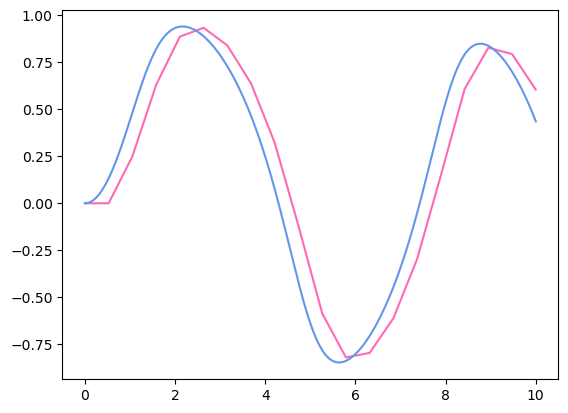

In [310]:
t0 = 0
tf = 10
x0 = 0

for Nt in [20, 1000]:
    plt.plot(*BulirschStoer_recursive(x0, t0, tf, Nt,1e-8))

## Exercise 5

Repeat Exercise 1 using scipy.integrate.odeint

In [94]:
from scipy import integrate

In [100]:
help(integrate.odeint)

Help on function odeint in module scipy.integrate._odepack_py:

odeint(func, y0, t, args=(), Dfun=None, col_deriv=0, full_output=0, ml=None, mu=None, rtol=None, atol=None, tcrit=None, h0=0.0, hmax=0.0, hmin=0.0, ixpr=0, mxstep=0, mxhnil=0, mxordn=12, mxords=5, printmessg=0, tfirst=False)
    Integrate a system of ordinary differential equations.
    
    .. note:: For new code, use `scipy.integrate.solve_ivp` to solve a
              differential equation.
    
    Solve a system of ordinary differential equations using lsoda from the
    FORTRAN library odepack.
    
    Solves the initial value problem for stiff or non-stiff systems
    of first order ode-s::
    
        dy/dt = func(y, t, ...)  [or func(t, y, ...)]
    
    where y can be a vector.
    
    .. note:: By default, the required order of the first two arguments of
              `func` are in the opposite order of the arguments in the system
              definition function used by the `scipy.integrate.ode` class and
 

Text(0.5, 1.0, 'scipy.integrate.odeint')

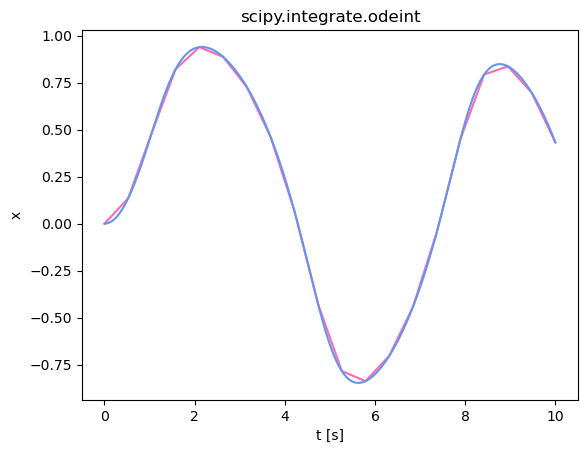

In [113]:
def scipy_int(x0, t0, tf, N):
    t = np.linspace(t0, tf, N)
    x = integrate.odeint(f, x0, t)
    return t, x

x0 = 0
t0 = 0
tf = 10
for N in [20, 1000]:
    t, x = scipy_int(x0, t0, tf, N)
    plt.plot(t, x, label=f"{N} steps")
plt.xlabel("t [s]")
plt.ylabel("x")
plt.title("scipy.integrate.odeint")

## Exercise 6

Plot your Exercise 1 through 5 results for $N=20$, on the same graph.

Plot your Exercise 1 through 5 results for $N=1000$, on the same graph. 

(So you should have 2 graphs for this exercise.)

Text(0, 0.5, 'x')

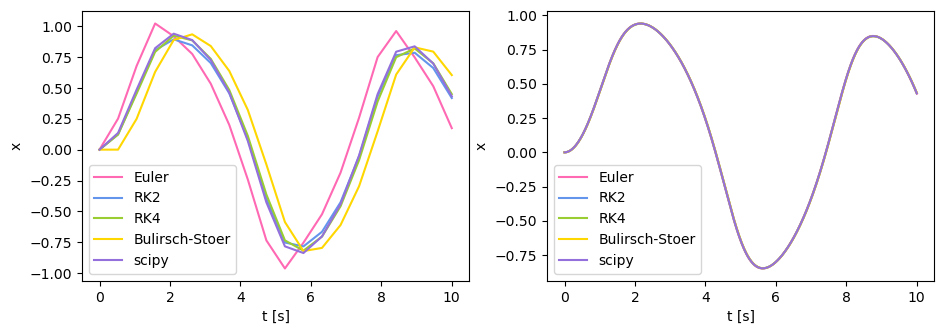

In [128]:
fig, axs = plt.subplots(1, 2, figsize=(11, 3.5))

x0 = 0
t0 = 0
tf = 10
N1 = 20
N2 = 1000

int_fs = [euler, RK2, RK4, BulirschStoer, scipy_int]
labels = ["Euler", "RK2", "RK4", "Bulirsch-Stoer", "scipy"]

for func in int_fs:
    axs[0].plot(*func(x0, t0, tf, N1))
    axs[1].plot(*func(x0, t0, tf, N2))

axs[0].legend(labels)
axs[1].legend(labels)

axs[0].set_xlabel("t [s]")
axs[1].set_xlabel("t [s]")
axs[0].set_ylabel("x")
axs[1].set_ylabel("x")

# Stability of ODE Solutions

* We have focused on accuracy and speed in investigating our solutions to ODEs.
* But stability is also important!
* The stability of solutions tells us how fast initially close solutions diverge from each other.
* In other words, a stable solution tends to a finite number.
* Some systems are inherently unstable and so will always be challenging to simulate. Physical stability or instability of a system can be determined from small perturbations to a solution of the ODE.
* But even for physically stable systems, numerical methods can be unstable (i.e. give approximation and roundoff errors that grow).

## Exercise 7

Consider: $y'(t) = -2.3y(t), y(t=0) = 1$

The analytical solution is:
$y(t) = \exp (-2.3 t)$ . This is a stable solution, i.e. it tends to a finite number: $y \rightarrow 0$ as $t \rightarrow \infty$

Demonstrate (by making 2 plots) that computationally, the Euler method for the interval $0 < t < 20$ is stable for $h=0.7$ but unstable for $h=1$.

Text(0.5, 1.0, 'h=1')

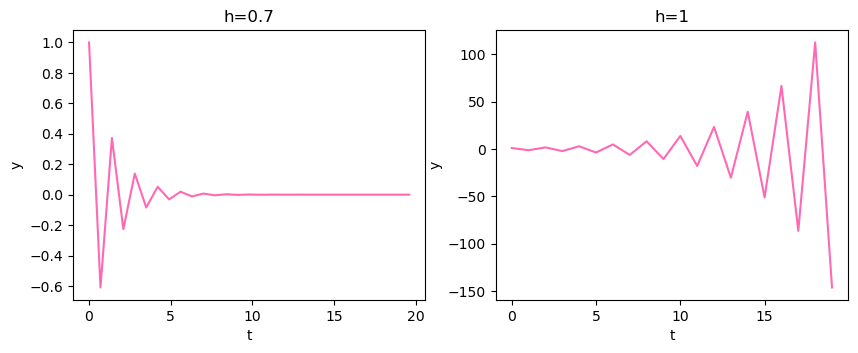

In [140]:
def k(y):
    return -2.3*y

def euler2(x0, t0, tf, h):
    t = np.arange(t0, tf, h)

    x = np.zeros(len(t))
    x[0] = x0
    for i in range(1, Nt):
        x[i] = x[i-1] + h*k(x[i-1])
    return t, x

y0 = 1
t0 = 0
tf = 20
h1 = 0.7
h2 = 1


t1, y1 = euler2(y0, t0, tf, h1)
t2, y2 = euler2(y0, t0, tf, h2)

fig, axs = plt.subplots(1, 2, figsize=(10, 3.5))
axs[0].plot(t1, y1)
axs[1].plot(t2, y2)

axs[0].set_xlabel("t")
axs[0].set_ylabel("y")
axs[1].set_xlabel("t")
axs[1].set_ylabel("y")

axs[0].set_title(f"h={h1}")
axs[1].set_title(f"h={h2}")